In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str

In [3]:
def process_value(state: AgentState) -> AgentState:
    """function handle muliple differnt inputs"""
    state["result"] = f"Hi there, {state['name']}! Your total mark: {sum(state["values"])}"
    return state

In [4]:
graph = StateGraph(state_schema=AgentState)
graph.add_node("marks_evalutor", process_value)
graph.set_entry_point("marks_evalutor")
graph.set_finish_point("marks_evalutor")
app = graph.compile()

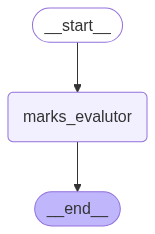

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
response = app.invoke({"values":[80,60,55,76,48], "name": "Ajay"})

In [10]:
response["result"]

'Hi there, Ajay! Your total mark: 319'